In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
#!pip install wordcloud
from wordcloud import WordCloud,STOPWORDS
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
import re
sns.set()

In [3]:
%%time
pd.read_json('tweets.json', lines=True).to_csv('pandas1.csv') #convert json to csv 
pd.set_option('display.max_columns', None)

Wall time: 8.04 s


In [4]:
df = pd.read_csv('pandas1.csv')                               #set pandas1 to dataframe

In [5]:
df = df[['created_at', 'text', 'source', 'user','entities', 'lang', 'possibly_sensitive']]
df = df[df.lang == 'en']
def device(source):
    if source == '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>':
        return('Android')
    elif source == '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>':
        return('iPhone')
    elif source == '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>':
        return('Web Browser')
    elif source == '<a href="http://twitter.com/#!/download/ipad" rel="nofollow">Twitter for iPad</a>':
        return('iPad')
    else:
        return('other')
    
df['source'] = df.source.map(lambda x : device(x))

Android        2362
iPhone         1713
Web Browser    1385
other           573
iPad            234
Name: source, dtype: int64

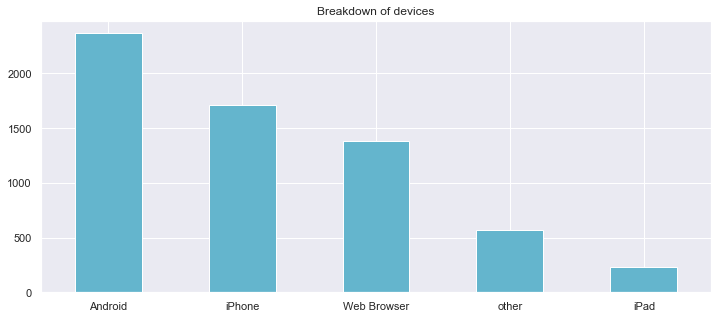

In [6]:
df.source.value_counts().plot(kind='bar', rot=0, title='Breakdown of devices',  color = 'c', figsize=(12, 5)); 
df['source'].value_counts()

In [7]:
df['entities'] = df['entities'].str.lower()

In [8]:
def replacer(entities):
    return(entities.replace("'", ""))
    
df['entities'] = df.entities.map(lambda x : replacer(x))

In [9]:
def hashtag(entities):
    pattern = "{hashtags:(.*?)urls:"
    substring = re.search(pattern, entities).group(1)
    return(substring)
df['entities'] = df.entities.map(lambda x : hashtag(x))

In [10]:
def replacer2(entities):
    entities = entities.replace(("["), "")
    entities = entities.replace(("{"), "")
    entities = entities.replace(("]"), "")
    entities = entities.replace(("}"), "")
    entities = entities.replace(("indices"), "")
    entities = entities.replace((","), "")
    entities = entities.replace((":"), "")
    entities = entities.replace(("text"), "")
    entities = entities.replace(("covid"), "")
    entities = entities.replace(("coronavirus"), "")
    entities = entities.replace(("coronavirus"), "")
    entities = entities.replace(("coronavirusoutbreak"), "")
    entities = entities.replace(("covid_"), "")
    entities = entities.replace(("corona"), "")
    return(entities)
df['entities'] = df.entities.map(lambda x : replacer2(x))

In [11]:
def replacer3(entities):
    pattern = '[0-9]'
    list1 = [re.sub(pattern, '', entities)]
    return list1

df['entities'] = df.entities.map(lambda x : replacer3(x))

df.rename(columns = {'entities':'hashtags'}, inplace = True) 

In [12]:
#pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', None)

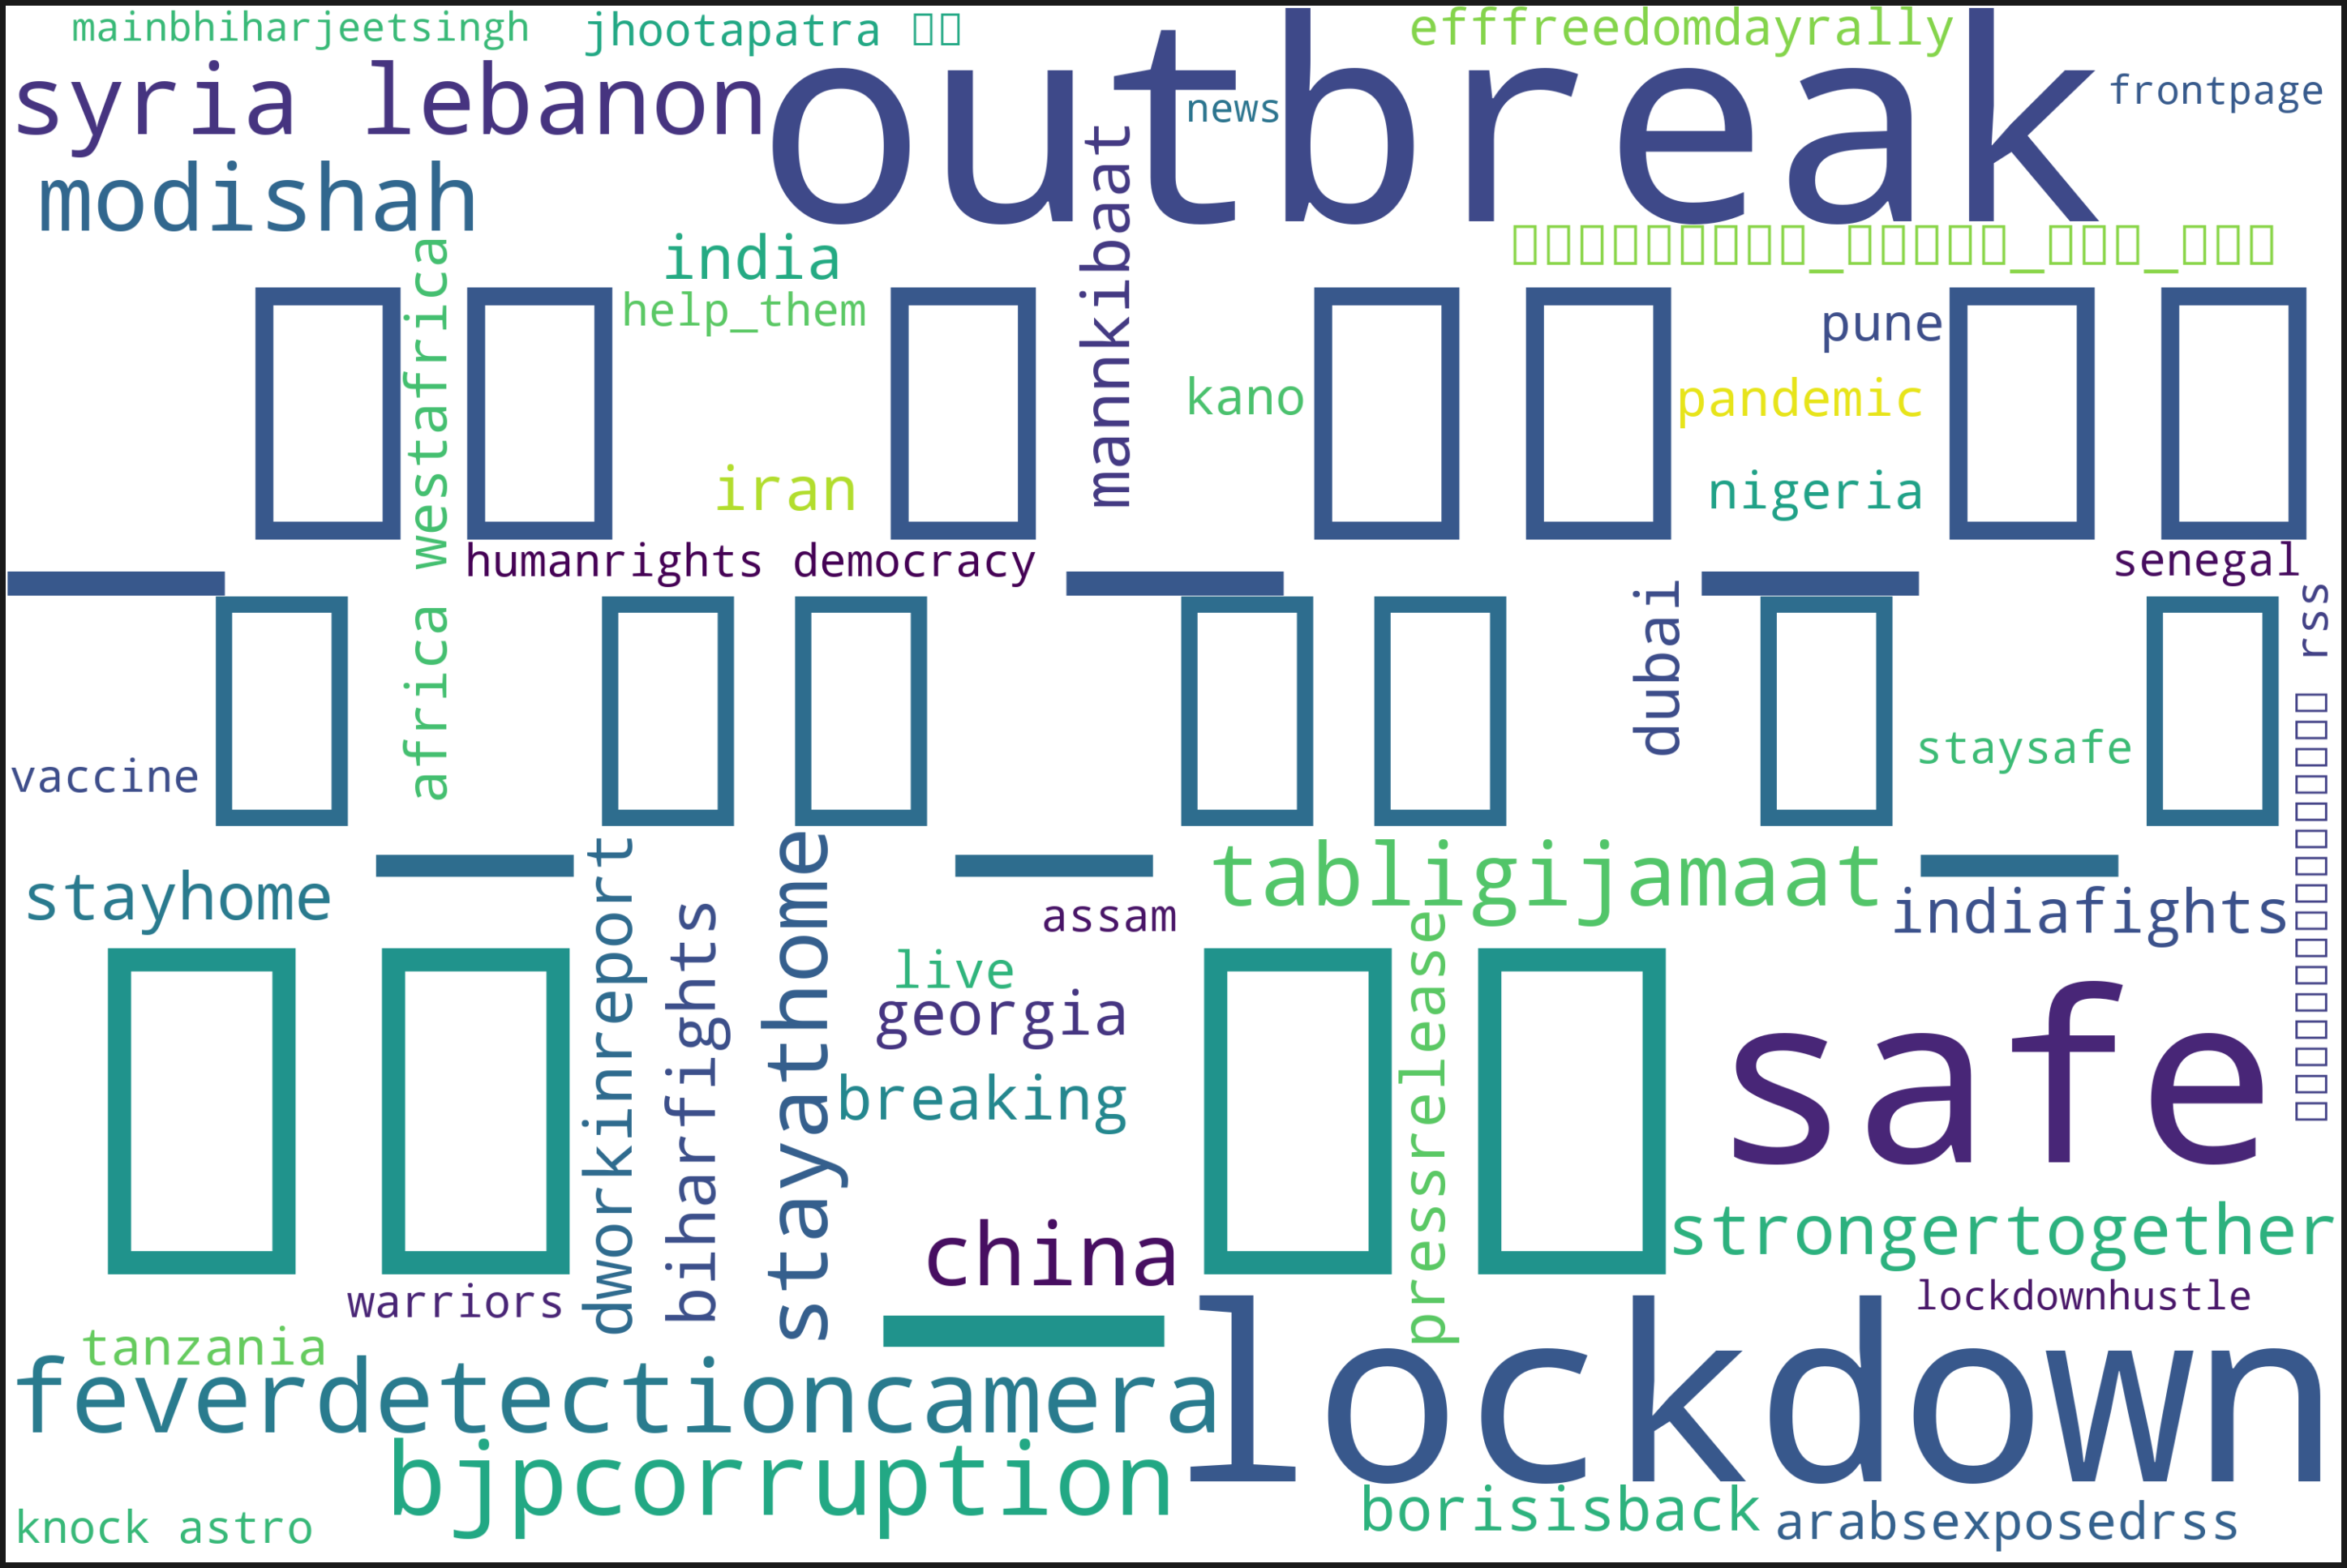

In [17]:
from wordcloud import WordCloud, STOPWORDS
text = df['hashtags']
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'white',
    max_words = 50,
    stopwords = STOPWORDS).generate(str(text))
    
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()